In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks
Find the linear regression equation for this data for brain weight to body weight.
Chart the original data and the equation on the chart.
Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_fwf("brain_body.txt")

In [3]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [4]:
df.shape

(62, 2)

In [5]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [6]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [7]:
df=df.drop_duplicates()

In [8]:
df.dtypes

Brain    float64
Body     float64
dtype: object

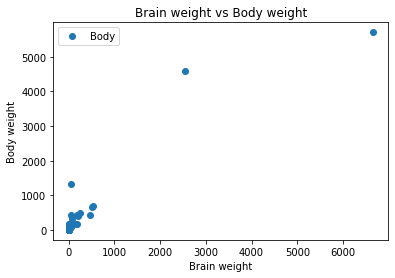

In [9]:
df.plot(x='Brain',y='Body',style='o')
plt.title('Brain weight vs Body weight')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()

In [10]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [11]:
#cleaning outliar

In [12]:
percentile_25=df['Brain'].quantile(0.25)
percentile_75=df['Brain'].quantile(0.75)
iqr= percentile_75-percentile_25
print("IQR is",iqr)
print('25% th value of brain data is ',percentile_25)
print('75% th value of brain data is ',percentile_75)

IQR is 47.6025
25% th value of brain data is  0.6000000000000001
75% th value of brain data is  48.2025


In [13]:
#Finding upper and lower limit
upper_limit= percentile_75+1.5 * iqr
lower_limit= percentile_25-1.5 * iqr
print('Lower limit of brain data =',lower_limit)
print('upper limit of brain data =',upper_limit)

Lower limit of brain data = -70.80375000000001
upper limit of brain data = 119.60625


In [14]:
#for x in df.index:
#    if df.loc[x, "Brain"] > 119.60625:
#        df.drop(x, inplace=True)

In [15]:
#for x in df.index:
#    if df.loc[x, "Brain"] < -70.80:
#        df.drop(x, inplace=True)

In [16]:
#df

# spliting the data

In [17]:
X = df.loc[:,['Brain']].values
y = df.loc[:,'Body'].values

In [18]:
X

array([[3.385e+00],
       [4.800e-01],
       [1.350e+00],
       [4.650e+02],
       [3.633e+01],
       [2.766e+01],
       [1.483e+01],
       [1.040e+00],
       [4.190e+00],
       [4.250e-01],
       [1.010e-01],
       [9.200e-01],
       [1.000e+00],
       [5.000e-03],
       [6.000e-02],
       [3.500e+00],
       [2.000e+00],
       [1.700e+00],
       [2.547e+03],
       [2.300e-02],
       [1.871e+02],
       [5.210e+02],
       [7.850e-01],
       [1.000e+01],
       [3.300e+00],
       [2.000e-01],
       [1.410e+00],
       [5.290e+02],
       [2.070e+02],
       [8.500e+01],
       [7.500e-01],
       [6.200e+01],
       [6.654e+03],
       [3.500e+00],
       [6.800e+00],
       [3.500e+01],
       [4.050e+00],
       [1.200e-01],
       [2.300e-02],
       [1.000e-02],
       [1.400e+00],
       [2.500e+02],
       [2.500e+00],
       [5.550e+01],
       [1.000e+02],
       [5.216e+01],
       [1.055e+01],
       [5.500e-01],
       [6.000e+01],
       [3.600e+00],


In [19]:
y

array([4.450e+01, 1.550e+01, 8.100e+00, 4.230e+02, 1.195e+02, 1.150e+02,
       9.820e+01, 5.500e+00, 5.800e+01, 6.400e+00, 4.000e+00, 5.700e+00,
       6.600e+00, 1.400e-01, 1.000e+00, 1.080e+01, 1.230e+01, 6.300e+00,
       4.603e+03, 3.000e-01, 4.190e+02, 6.550e+02, 3.500e+00, 1.150e+02,
       2.560e+01, 5.000e+00, 1.750e+01, 6.800e+02, 4.060e+02, 3.250e+02,
       1.230e+01, 1.320e+03, 5.712e+03, 3.900e+00, 1.790e+02, 5.600e+01,
       1.700e+01, 1.000e+00, 4.000e-01, 2.500e-01, 1.250e+01, 4.900e+02,
       1.210e+01, 1.750e+02, 1.570e+02, 4.400e+02, 1.795e+02, 2.400e+00,
       8.100e+01, 2.100e+01, 3.920e+01, 1.900e+00, 1.200e+00, 3.000e+00,
       3.300e-01, 1.800e+02, 2.500e+01, 1.690e+02, 2.600e+00, 1.140e+01,
       2.500e+00, 5.040e+01])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 1)


In [21]:
y_test

array([6.55e+02, 1.20e+00, 4.00e-01, 2.56e+01, 8.10e+00, 4.90e+02,
       2.50e+00, 3.92e+01, 5.60e+01, 1.57e+02, 1.21e+01, 2.50e-01,
       1.75e+01, 1.80e+02, 2.40e+00, 4.23e+02, 1.25e+01, 6.80e+02,
       4.00e+00])

In [22]:
X

array([[3.385e+00],
       [4.800e-01],
       [1.350e+00],
       [4.650e+02],
       [3.633e+01],
       [2.766e+01],
       [1.483e+01],
       [1.040e+00],
       [4.190e+00],
       [4.250e-01],
       [1.010e-01],
       [9.200e-01],
       [1.000e+00],
       [5.000e-03],
       [6.000e-02],
       [3.500e+00],
       [2.000e+00],
       [1.700e+00],
       [2.547e+03],
       [2.300e-02],
       [1.871e+02],
       [5.210e+02],
       [7.850e-01],
       [1.000e+01],
       [3.300e+00],
       [2.000e-01],
       [1.410e+00],
       [5.290e+02],
       [2.070e+02],
       [8.500e+01],
       [7.500e-01],
       [6.200e+01],
       [6.654e+03],
       [3.500e+00],
       [6.800e+00],
       [3.500e+01],
       [4.050e+00],
       [1.200e-01],
       [2.300e-02],
       [1.000e-02],
       [1.400e+00],
       [2.500e+02],
       [2.500e+00],
       [5.550e+01],
       [1.000e+02],
       [5.216e+01],
       [1.055e+01],
       [5.500e-01],
       [6.000e+01],
       [3.600e+00],


In [23]:
X_train.shape, X_test.shape

((43, 1), (19, 1))

In [24]:
#from sklearn.preprocessing import StandardScaler # importing the required function
#scaler = StandardScaler() #initialis
#scaler.fit(X_train.reshape(-1,1)) # find the values of mu and sigma
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [25]:
#scaler.var_

In [26]:
X_test

array([[5.210e+02],
       [7.500e-02],
       [2.300e-02],
       [3.300e+00],
       [1.350e+00],
       [2.500e+02],
       [1.040e-01],
       [4.288e+00],
       [3.500e+01],
       [1.000e+02],
       [2.500e+00],
       [1.000e-02],
       [1.410e+00],
       [1.920e+02],
       [5.500e-01],
       [4.650e+02],
       [1.400e+00],
       [5.290e+02],
       [1.010e-01]])

In [27]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [28]:
print(regressor.intercept_)

115.55541349988076


In [29]:
print(regressor.coef_)

[0.96093307]


In [30]:
regressor.predict([[3]])

array([118.4382127])

In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,655.00,616.201541
1,1.20,115.627483
2,0.40,115.577515
3,25.60,118.726493
4,8.10,116.852673
5,490.00,355.788680
6,2.50,115.655351
7,39.20,119.675894
8,56.00,149.188071
9,157.00,211.648720


In [35]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([616.20154059, 115.62748348, 115.57751496, 118.72649262,
       116.85267314, 355.78867986, 115.65535054, 119.67589448,
       149.18807079, 211.64872004, 117.95774616, 115.56502283,
       116.91032912, 300.05456206, 116.08392669, 562.38928893,
       116.90071979, 623.88900512, 115.65246774])

# R2 Evaluation metric

In [44]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7888057194409372


R2 is less than 0.8 so model has medium linear relationship  